In [14]:
import pandas as pd
data=pd.read_excel('reports.xlsx' , sep=';')

In [15]:
data1=data[data['Категория обращения']=="Тарифы и услуги"]

In [16]:
data1

,#,Название проекта,Имя,Мобильный телефон,Email,Порядковый номер диалога,Дата начала диалога,Время начала диалога,Время ожидания ответа,Время первого сообщения оператора,...,Просмотрено страниц,Провел на сайте,Первая страница,Последняя страница,1 сообщение,Google Analytics ClientId,Skype,Примечание,Выбор отдела,Примечание.1
7,422003411,tcell.tj,Нигора,992927005313,NaN,2,15.07.2022,08:01:54,00:00:17,08:02:11,...,28,1 час,https://admin.verbox.ru/support/chat/1d0d2c425...,https://admin.verbox.ru/support/chat/1d0d2c425...,https://admin.verbox.ru/support/chat/1d0d2c425...,NaN,NaN,NaN,NaN,NaN
14,421908821,tcell.tj,Муҳаммад,992922126699,NaN,2,15.07.2022,08:08:15,00:00:20,08:08:35,...,12,43 минуты,https://www.tcell.tj/mobile-internet/options/u...,https://www.tcell.tj/tariffs/social.php,https://www.tcell.tj/tariffs/social.php,NaN,NaN,NaN,NaN,NaN
16,422010976,tcell.tj,Тарофаи Даркор 60 Чи Тавр Хомуш Кард,NaN,NaN,1,15.07.2022,08:11:58,00:00:20,08:12:18,...,2,21 минута,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN
17,421986706,tcell.tj,Смс Сообщения,992927322301,NaN,4,15.07.2022,08:14:25,00:00:13,08:14:38,...,14,2 часа,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN
19,419082626,tcell.tj,Сорбон,992926204900,NaN,32,15.07.2022,08:17:01,00:00:05,08:17:06,...,56,4 часа,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,422025879,tcell.tj,ЁРОВ УМЕДЖОН,79999676295,NaN,1,17.07.2022,21:39:17,00:00:39,21:39:56,...,2,9 минут,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN
1803,422025839,tcell.tj,Валиджон,992935056363,NaN,1,17.07.2022,21:39:18,00:00:42,21:40:00,...,9,10 минут,https://www.tcell.tj/services/basic-services/c...,https://www.tcell.tj/,https://www.tcell.tj/,1.141322e+08,NaN,NaN,NaN,NaN
1804,422025901,tcell.tj,929907100,992929907100,NaN,1,17.07.2022,21:42:34,00:00:36,21:43:10,...,8,15 минут,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN
1805,420688008,tcell.tj,Ватсап,992501044002,NaN,3,17.07.2022,21:43:24,00:00:10,21:43:34,...,20,35 минут,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,https://www.tcell.tj/bitrix/templates/chat.php,NaN,NaN,NaN,NaN,NaN


In [17]:
reports=data1['Текст чата']


In [18]:
report=[]
for i in reports:
    report.append(i)

In [19]:
client=[]
operator=[]
for i in range(len(report)-1):
    for sentence in report[i].split('\n\n') :
        if 'Клиент' in sentence:
            client.append(sentence)
        else:
            operator.append(sentence)

In [20]:
clientResponse=[]
for i in client:
    head, sep, tail = i.partition('\n')
    clientResponse.append(tail)
clientResponse

operatorResponse=[]
for i in operator:
    head, sep, tail = i.partition('\n')
    operatorResponse.append(tail)


In [21]:
clientResponse = [i.replace("?", "") for i in clientResponse]
clientResponse = [i.replace(".", "") for i in clientResponse]
clientResponse = [i.replace("!", "") for i in clientResponse]


Removing consecutive letters and converting all to cyrilic

In [22]:
from transliterate import translit
def removeConsecutiveDuplicates(s):
    if len(s)<2:
        return s
    if s[0]!=s[1]:
        return s[0]+removeConsecutiveDuplicates(s[1:])
    return removeConsecutiveDuplicates(s[1:])

clientR=[]
for i in clientResponse:
    i = i.lower()
    i=translit(i, "ru")
    clientR.append(removeConsecutiveDuplicates(i))


In [23]:
clientR

['здравствуйте,что входит в тариф за 59 сомон',
 'что входит в тариф +соцсети65',
 'и интернет65',
 'в приложени не очень ясно описаны преимущества тарифов…',
 '+интернет65*',
 'клиент [08:08:1]:\nможно тарифный план «+интернет65»',
 'какие преимущества у моего тарифа',
 'салом',
 'соцсети 65 кадом месенҷеро дохил мешавад',
 'дар сайт маълумоти лозима наёфтам',
 'дар месенҷеро',
 'месенҷеро',
 'фақат чат ё ҳамаи функсияҳо кор мекунад',
 'асалом',
 'тарофаи даркор 60 хомуш карда мешавад',
 'мехохам иваз намоям',
 '30 сомони бошад маблагаш',
 'ташакури зиёд',
 'пайваст кардам амо 《смена тарифа вам не доступна》 гуфтос',
 '9210304',
 'эгамова рамзия',
 'рахмат',
 'барои чи чавоб надодаистодаед',
 'ва ё умуман ба ягон тарофа пайваст накунед',
 'ин хел бошад маро ба тарофаи опция г пайваст кунед',
 'асалом алайкум',
 'чхел балы мегирад ',
 'чанд сомон гузаронем чанка бал метияд',
 'маълумот медоден',
 'хозир ман 380 сомон гузаронидам ягон бал надод ку',
 'агар пула гузаронида тарики тезсум б

In [24]:
counter={}
for i in set(clientR):
    counter[i]=clientR.count(i)


In [26]:
def countWords(s):
    if s.strip() == "":
        return 0  
    words = s.split()
    return len(words)
greetingClient=[]
for i in counter.copy():
    if countWords(i)<=3:
        if "салом"in i or'добрый' in i or 'здра' in i or 'приве' in i:
            greetingClient.append(i)
            counter.pop(i)
        
greetingClient


[]

In [27]:
numbers=[]
for i in counter.copy():
    if countWords(i)<=1:
        if i.isdigit():
            numbers.append(i)
            counter.pop(i)
numbers

['931261312',
 '928363939',
 '13501',
 '937095',
 '2',
 '926090598',
 '929475',
 '927856060',
 '9353090',
 '938056098',
 '92974292',
 '935485',
 '9209512',
 '9309076',
 '1',
 '927319357',
 '92617586',
 '937287',
 '1313',
 '927073245',
 '93781253',
 '1407202',
 '127404',
 '93937050',
 '9307534',
 '93017537',
 '93580495',
 '927079191',
 '926276',
 '937015101',
 '9210304',
 '931954695',
 '93026517',
 '93108082',
 '931684',
 '932017425',
 '92638312',
 '92028968',
 '9383692',
 '931863908',
 '928640201',
 '106',
 '93082727',
 '93167059',
 '71757',
 '9363930',
 '93586786',
 '93141301',
 '9373203',
 '9201210',
 '9381828',
 '926029216',
 '931510959',
 '92652',
 '934151',
 '934787',
 '927327',
 '92589',
 '926154296',
 '934541013',
 '818',
 '1532',
 '93075454',
 '92849413',
 '92845969',
 '92728023',
 '25',
 '927516538',
 '92939306',
 '1323',
 '92795758',
 '92807028',
 '93141302']

In [44]:
# no_need=[]
# for i in counter.copy():
#     if len(i)<=3:
#         if i!='4г' and i!='3г':
#             no_need.append(i)
#             counter.pop(i)
# no_need

['',
 'апа',
 'ау',
 'алн',
 'ако',
 'ина',
 'жду',
 'ман',
 'г10',
 'мб',
 'буд',
 'але',
 'чхе',
 'ф',
 'алу',
 '\u200d♂️',
 'ми',
 'а7',
 'спс',
 'сао',
 '10*',
 'э',
 'ака',
 'бад',
 'код',
 'хе',
 'не',
 'ало',
 'ози',
 'нет',
 'у',
 'ещё',
 'хош',
 'шуд',
 'ма',
 '¿',
 'оло',
 'н',
 '(',
 'нг',
 'л',
 'кор',
 '…',
 'д',
 'с',
 '®',
 'и',
 'я',
 'хоз',
 '\u200d♀️',
 '*а',
 'хан',
 'п',
 'ей',
 'ок',
 'кай',
 'ну',
 'чи',
 'и +',
 'ҳо',
 'ч',
 ' ',
 'ба',
 'алё',
 'уф',
 ',',
 'ла"',
 'ку',
 'ао',
 '4дж',
 'хоб',
 'да',
 'хм',
 '✊',
 'хоп',
 '+5 ',
 'о',
 'са',
 'нея',
 'ҳа',
 'е',
 'эжэ',
 'хо',
 'хуб',
 'р ,',
 'мда',
 'дц',
 'кнм',
 'боз',
 'к',
 'чав',
 'тар',
 'т',
 'м',
 'ха',
 'чва',
 'куш',
 'а',
 'как',
 'вк',
 'пло',
 '4 г',
 'аст',
 'смс',
 'а8']

In [28]:
thanks=[]
for i in counter.copy():
    if countWords(i)<=2:
        if 'ташак' in i or 'спасиб' in i or 'рахмат' in i  or 'раҳмат' in i:
            thanks.append(i)
            counter.pop(i)
thanks

['спасибо',
 'раҳмат',
 'якчахон ташакур',
 'рахмати калон ',
 'спасибо большое',
 'ташакури бепойон',
 'ташакур',
 'рахмат ако',
 'рахмат',
 'ок рахмат',
 'ташакури зиёд',
 'спасибо досвиданье',
 'рахматов немутуло',
 'рахмат калон',
 'ок, спасибо',
 'фахмо рахмат',
 'спасибо большое)',
 '10 рахмат',
 'все спасибо',
 'раҳмати калон',
 'ташакури зиед',
 'ташакуе',
 'спасибо ',
 'хорошо спасибо',
 'рахмат апа',
 'хорошо, спасибо',
 'ясно, спасибо',
 'спасибо вам',
 'ташакур зиёд',
 'хуб, ташакур',
 'спасибо огромное',
 'рахматов нематуло',
 'фахмо ташакур',
 'рахмат♥️',
 'ок спасибо',
 'рахмати калон']

In [29]:
counter

{'': 135,
 'маълумот дар бораи сотсети+65 мумкинми': 1,
 'услугаи шахри бехатар кор кадестай': 1,
 'барои як хафта': 1,
 'барои дастгиритон': 1,
 'у меня было 20гб я их потратил уже': 1,
 'асалому алейкум субх ба хайр': 1,
 'интерети 1 рущина': 1,
 'акаҷон 92940901 ҳамин номера бенид якбор а кадом ҳисоб каздор шудаги': 1,
 'вакти у занг мезана у вас недостаточно средства мега бад гдок мерава': 1,
 'ягон варяте нест ки ягон интернет подключить кнем вотсап безлимитный боща бад ютуб дополнительно подключат кнем': 1,
 'безлимитка 9 сомона 150мб тамом шавад далше кор кардан мегирад': 1,
 'мехостам коди мегабайтхо равон кунед': 1,
 'без учёта 50 мб подарок ещё сколько мб осталось мне': 1,
 'на моём имени да ': 1,
 'хорошо, я понял': 1,
 'имг-2020717-wа04йпг (32 кб) хтпс:/доwнлоадме-талкру/доwнлоадпхпф=дцф8ф5ц58б7бае2б803131576б1350йпг': 1,
 '92178121 ози инами номерда амихели пайваст кадаги': 1,
 'кадом категория аст': 1,
 'набираю код говорит ошибка': 1,
 'ака ин номерой маро тафтиш кунед я

In [31]:
tarif=[]
for i in counter.copy():
    if 'тариф' in i  or 'тароф' in i:
        tarif.append(i)


In [32]:
code=[]
for i in counter.copy():
    if 'код' in i:
        code.append(i)

In [33]:
social=[]
for i in counter.copy():
    if 'соц' in i:
        social.append(i)


In [34]:
chigap=[]
for i in counter.copy():
    if 'чигап' in i:
        chigap.append(i)


In [35]:
podk=[]
for i in counter.copy():
    if 'подк' in i:
        podk.append(i)

In [36]:
mg=[]
for i in counter.copy():
    if 'мг' in i  or 'мега' in i  or 'кб' in i:
        mg.append(i)


In [37]:
bezlimit=[]
for i in counter.copy():
    if 'безлимит' in i or  'бемахдуд' in i:
        bezlimit.append(i)


In [38]:
work=[]
for i in counter.copy():
    if 'кор' in i or  'рабо' in i:
        work.append(i)


In [39]:
internet=[]
for i in counter.copy():
    if 'интернет' in i :
        internet.append(i)


In [40]:
g=[]
for i in counter.copy():
    if '4г' in i or '3г' in i :
        g.append(i)


In [41]:
money=[]
for i in counter.copy():
    if 'сом' in i or 'сум' in i or 'пул' in i :
        money.append(i)


In [42]:
sim=[]
for i in counter.copy():
    if 'сим' in i:
        sim.append(i)


In [47]:
social

['я подключила +соц сети 105 думая что интернет хороший а тут ужасное качество медлено загружает что мне делать ',
 'в соц сетях качество ужасное просто',
 'салом безлимитный социальные сети',
 'тока соцсети ',
 'на каких соц сетях у меня безлимит',
 'или месенджеры и соц сети бесплатны',
 'мне нужны мегабайты и безлимитные на соц сети',
 'соцсети + очень дорого тариф хороший',
 'здравствуйте, есть тп в котором соц сети вайбер вацап телеграм безлимит и есть мб и звонки',
 'ман ба тарифи + соцсети 205 гузаштам ман мехохам тарофаи худро иваз кунам метавонам ба дигар тарофа гузарам ',
 'салом агар ман соцветия 65 сомониро пайваст кунам тарифиман авалин 2016 хомуш мешавад',
 'мне нужно чтоб соц сети и месенджери были бесплатно и интернет был побольще',
 'ҳамаи соц сети бепул мешад',
 'а + соцсети 65 там какие социальные сети, и какой трафик кроме соцсети',
 'кадом социальный сети дохил мешавад',
 'дар тарофаи соцсети 65 имо безлимит дорад',
 'здравствуйте, как подключить безлимитный соцсет

In [43]:
#sim money g internet work bezlimit mg podk chigap social code tarif
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

NameError: name 'st' is not defined

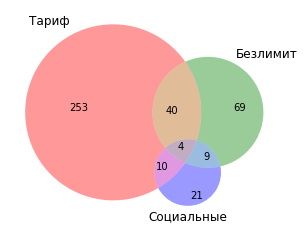

In [44]:
set1 = set(tarif)
set2 = set(bezlimit)
set3 = set(social)
fig, ax = plt.subplots()
venn3([set1, set2, set3], ('Тариф', 'Безлимит', 'Социальные'), ax=ax)
st.pyplot(fig)

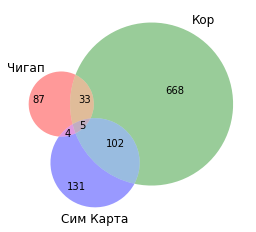

In [ ]:
set1 = set(chigap)
set2 = set(work)
set3 = set(sim)
venn3([set1, set2, set3], ('Чигап', 'Кор', 'Сим Карта'))

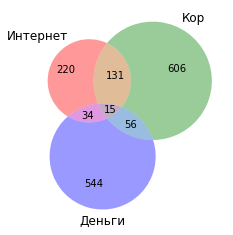

In [ ]:
set1 = set(internet)
set2 = set(work)
set3 = set(money)
venn3([set1, set2, set3], ('Интернет', 'Кор', 'Деньги'))

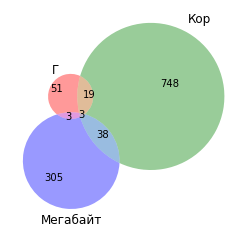

In [ ]:
set1 = set(g)
set2 = set(work)
set3 = set(mg)
venn3([set1, set2, set3], ('Г', 'Кор', 'Мегабайт'))

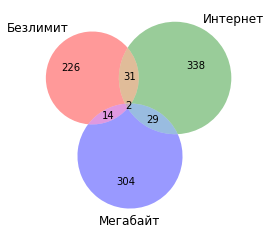

In [ ]:
set1 = set(bezlimit)
set2 = set(internet)
set3 = set(mg)
venn3([set1, set2, set3], ('Безлимит', 'Интернет', 'Мегабайт'))

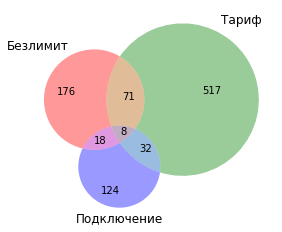

In [ ]:
set1 = set(bezlimit)
set2 = set(tarif)
set3 = set(podk)
venn3([set1, set2, set3], ('Безлимит', 'Тариф', 'Подключение'))

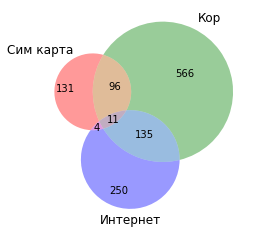

In [ ]:
set1 = set(sim)
set2 = set(work)
set3 = set(internet)
venn3([set1, set2, set3], ('Сим карта', 'Кор', 'Интернет'))

In [ ]:
# import operator
# d = dict((k, v) for k, v in counter.items() if v>2)
# d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(20,6))
# plt.xticks(rotation=90)
# plt.bar(d.keys(), d.values(),color='g')
# plt.show()

<h3>Words</h3>

In [ ]:
import operator
bb= dict((k, v) for k, v in counter.items() if v<=2)
bb = dict( sorted(bb.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
list12=[(k) for k,v in bb.items()]

In [ ]:
list12
words=' '.join(list12)


In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

wordCount = word_count(words)

In [ ]:
wordCount
wordCount = dict( sorted(wordCount.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
wordC= {key:wordCount[key] for key in wordCount if len(key)>1}
wordC

{'ман': 716,
 'ба': 685,
 'чи': 604,
 'дар': 430,
 'не': 427,
 'пайваст': 368,
 'кор': 345,
 'аз': 289,
 'барои': 267,
 'интернет': 256,
 'на': 237,
 'ин': 218,
 'ки': 213,
 'як': 211,
 'гап': 201,
 'номер': 199,
 'даркор': 184,
 'мешавад': 184,
 'кунам': 182,
 'тарофаи': 177,
 'хамин': 159,
 'кунед': 159,
 'занг': 154,
 'безлимит': 151,
 'да': 150,
 'шумо': 149,
 'бо': 149,
 'как': 146,
 'аст': 145,
 'ягон': 143,
 'тариф': 143,
 'карда': 143,
 'меня': 142,
 'нест': 140,
 'чихел': 132,
 'мб': 128,
 'мо': 123,
 '30': 123,
 'дигар': 122,
 'код': 120,
 'бошад': 115,
 'хомуш': 113,
 'ма': 111,
 'кб)': 110,
 'пул': 109,
 'что': 104,
 '10': 103,
 'чанд': 103,
 'мне': 100,
 'ай': 99,
 'кардан': 98,
 'шуд': 98,
 'ва': 98,
 'то': 95,
 'сомон': 93,
 'хами': 91,
 'ака': 89,
 'салом': 88,
 'чигап': 85,
 'кунем': 83,
 'хаст': 83,
 'коди': 81,
 'кадом': 80,
 'апа': 76,
 'клиент': 76,
 'рои': 75,
 'почему': 75,
 'есть': 75,
 'за': 74,
 'равон': 74,
 'апачон': 73,
 'кардам': 72,
 'тсел': 71,
 'подключ

Operator

In [ ]:
for i in operatorResponse:
    i=i.lower()


In [ ]:
operatorR=[]
for i in operatorResponse:
    i = i.lower()
    i=translit(i, "ru")
    operatorR.append(removeConsecutiveDuplicates(i))


In [ ]:
counterOperator={}
for i in set(operatorR):
    counterOperator[i]=operatorR.count(i)
    


In [ ]:
counterOperator = dict( sorted(counterOperator.items(), key=operator.itemgetter(1),reverse=True))


In [ ]:
operatorDictionary={}
counter=0
for i in counterOperator.copy():
    if countWords(i)<=6:
        if 'салом' in i or 'здра' in i or 'хорош' in i or 'добр' in i:
            a=int(counterOperator[i])
            counter+=a
            counterOperator.pop(i)

operatorDictionary['салом']=counter


In [ ]:
counter=0
for i in counterOperator.copy():
    if countWords(i)<=5:
        if 'ташакк' in i or 'спасибо' in i or 'заверш' in i:
            a=int(counterOperator[i])
            counter+=a
            counterOperator.pop(i)
            
operatorDictionary['bye']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'пайвастшави'in i  or  'подключение'in i:
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['Payvastshavi']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'категорию вопроса' in i:
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['Category']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'чигап' in i:
        a=int(countWords(i))
        counter+=a
        counterOperator.pop(i)
operatorDictionary['Chigap']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'интернети бемаҳдуд бо суръати' in i or 'безлимитный интернет до' in i :
        a=int(countWords(i))
        counter+=a
        counterOperator.pop(i)
operatorDictionary['Internet_Bemahdud']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'безлимит дар' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['Bezlimit_dar']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'занги содиротӣ' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['занги содиротӣ']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'тарофаи «' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['тарофаи «']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'ному насаб' in i  or 'фио' in i or 'ф,и,о' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['ному насаб ']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'хомӯш' in i  or 'хомуш' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['хомӯш']=counter

In [ ]:
counter=0
for i in counterOperator.copy():
    if 'скриншот' in i :
        a=int(counterOperator[i])
        counter+=a
        counterOperator.pop(i)
operatorDictionary['скриншот']=counter

In [ ]:
counter=0
office=[]
for i in counterOperator.copy():
    if 'офис' in i :
        a=int(counterOperator[i])
        counter+=a
        office.append(i)
        counterOperator.pop(i)
operatorDictionary['офис']=counter


In [ ]:
operatorDictionary

{'салом': 1383,
 'bye': 56,
 'Payvastshavi': 1159,
 'Category': 94,
 'Chigap': 36,
 'Internet_Bemahdud': 202,
 'Bezlimit_dar': 2,
 'занги содиротӣ': 111,
 'тарофаи «': 163,
 'ному насаб ': 390,
 'хомӯш': 256,
 'скриншот': 36,
 'офис': 6}

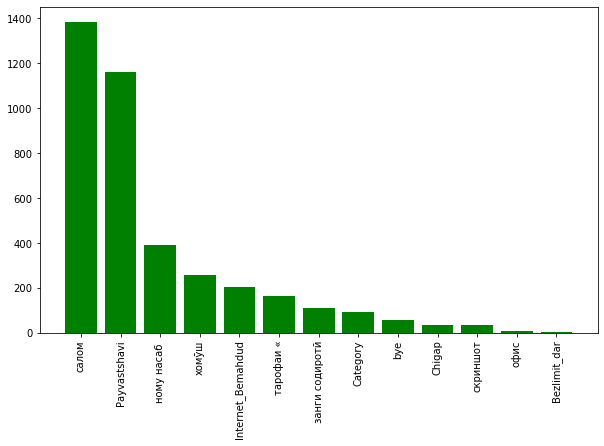

In [ ]:
operatorDictionary = dict( sorted(operatorDictionary.items(), key=operator.itemgetter(1),reverse=True))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.bar(operatorDictionary.keys(), operatorDictionary.values(),color='g')
plt.show()

In [ ]:
counterOperator

{'': 552,
 'вопрос помечен как риторический': 385,
 'воалейкум салом. чи кумак расонам ба шумо?': 293,
 'саломат бошед ва барори кор ба шумо муштари мухтарам !': 63,
 'дар ин навор дастурамали пура оиди бақайдгири ва настройка дар барномаи чи гап 2.0 нишон дода шудаст. \nлутфан ба саҳифаи зерин дар ыоутубе гузаред: хтпс:/ыоуту.бе/1зидз9xнw4': 50,
 'спасибо, что воспользовались нашими услугами. обращайтесь при возникновени вопросов!': 48,
 'мутасифона не.': 38,
 'саломат бошед ва барори кор ба шумо': 32,
 'офлине-вопрос завершен автоматически после отправки ответа': 30,
 'бо кадом мушкили дучор мешавед?\nмаълумотро пура пешниход мекардед.': 29,
 'бале.': 29,
 'обод бошед!': 23,
 'фацебок, инстаграм, вконтакте, однокласники, тwитер,\nвибер, wхацап, фацебок месенгер\n \nбесплатный трафик на соц. сети распространяется исключительно на внутрений ресурс сервицов.': 17,
 'агар тарофаи шумо архиви бошад, баъди гузариш ба ин тарофа, ба тарофаи авалаи худ баргашта наметавонед.': 17,
 'мархамат м